In [3]:
import zipfile as zf
files = zf.ZipFile("/Users/yuekunwang/Desktop/Cornell/Fall2018/ORIE5750_ML/Assignment/HW2/faces.zip", 'r')
files.extractall('directory to extract')
files.close()

(b)

(540, 2500) (540,)


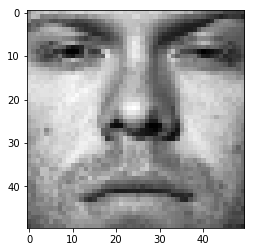

In [4]:

import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(c) Average Face.

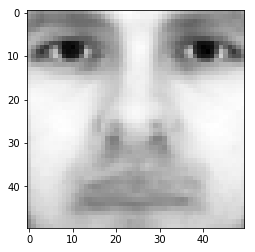

In [5]:
avg_face = train_data.mean(axis=0)
plt.imshow(avg_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()

(d) Mean Subtraction.

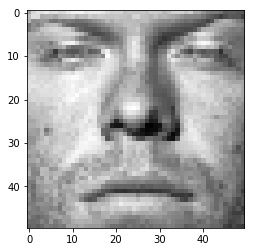

In [6]:
new_train_data = train_data
for row in new_train_data:
    for i in range(len(row)):
        row[i] = row[i] - avg_face[i]
plt.imshow(new_train_data[10, :].reshape(50,50), cmap = cm.Greys_r)


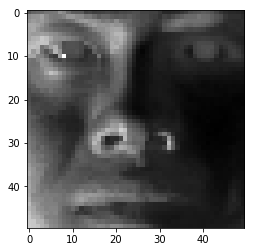

In [16]:
new_test_data = test_data
for row in new_test_data:
    for i in range(len(row)):
        row[i] = row[i] - avg_face[i]
plt.imshow(new_test_data[10, :].reshape(50,50), cmap = cm.Greys_r)


(e) Eigenface.

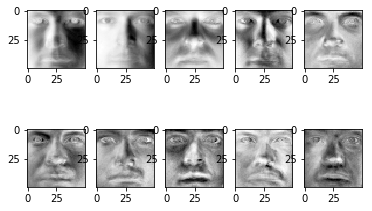

In [69]:
u, s, vh = np.linalg.svd(test_data, full_matrices=True)
count = 1
for i in range(10):
    ax = plt.subplot(2, 5, count)
    ax.imshow(vh[i,:].reshape(50,50), cmap = cm.Greys_r)
    count +=1

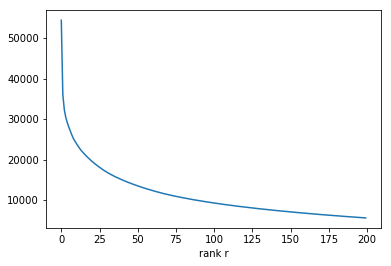

In [53]:
import matplotlib.pyplot as plt

def plot_error():
    u, s, vh = np.linalg.svd(train_data, full_matrices=True)
    X = np.mat(train_data)
    error = []

    for r in range(1, 201):
        u_r = np.mat(u[:, :r])
        s_r = np.mat(np.diag(s)[:r,:r])
        vh_r = np.mat(vh[:r, :])
        X_r = u_r * s_r * vh_r
        e = np.linalg.norm(X-X_r)
        error.append(e)
    
    plt.plot(error)
    plt.xlabel('rank r')
    plt.show()
    
    
plot_error()    

In [58]:

def train_face(vh, r):
    X = train_data
    return X.dot(vh[:r, :].T)

def test_face(vh, r):
    X = test_data
    return X.dot(vh[:r, :].T)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

u_test, s_test, vh_test = np.linalg.svd(test_data, full_matrices=True)

logreg = LogisticRegression()
logreg.fit(train_face(vh, 10), train_labels)
score_log = logreg.score(test_face(vh_test, 10), test_labels)
score_log


0.75

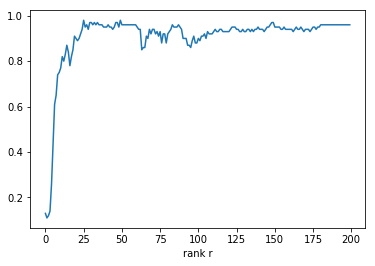

In [63]:
s = []
for r in range(1, 201):
    logreg.fit(train_face(vh, r), train_labels)
    score = logreg.score(test_face(vh_test, r), test_labels)
    s.append(score)
    
plt.plot(s)
plt.xlabel('rank r')
plt.show()
    

In [67]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

ovr = OneVsRestClassifier(LinearSVC(random_state=0))
ovr.fit(train_face(vh, 10), train_labels)
score_ovr = ovr.score(test_face(vh_test, 10), test_labels)
score_ovr


0.28999999999999998

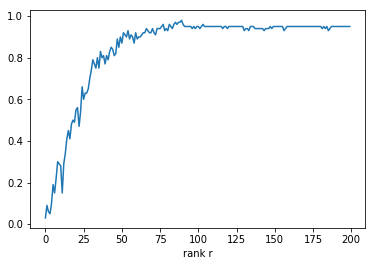

In [68]:
s_ovr = []
for r in range(1, 201):
    ovr.fit(train_face(vh, r), train_labels)
    score_ovr = ovr.score(test_face(vh_test, r), test_labels)
    s_ovr.append(score_ovr)
    
plt.plot(s_ovr)
plt.xlabel('rank r')
plt.show()